In [ ]:
pip install tensorflow==2.5


In [ ]:
import tensorflow
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense
import numpy as np


In [ ]:
dataset = np.loadtxt('/content/pima-indians-diabetes.csv',delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
train_size = int(len(dataset)/100*60)
test_size = int(len(dataset)/100*40)

x = dataset[:train_size,:8]
y = dataset[:train_size,8]

x_test = dataset[:test_size,:8]
y_test = dataset[:test_size,8]
model = Sequential()
model.add(Dense(16,input_dim= 8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,epochs=100)
score = model.evaluate(x_test,y_test)


Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 9.4479 - accuracy: 0.3804
Epoch 11/

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

train_size= int(len(dataset)/100*70)
test_size= int(len(dataset)/100*30)

X = dataset[:train_size,:8]
Y = dataset[:train_size, 8]

X_test = dataset[test_size:,:8]
Y_test = dataset[test_size:, 8]

model = Sequential()
model.add(Dense(16, input_dim=8, activation="sigmoid"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="tanh"))
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=2000)
scores = model.evaluate(X_test,Y_test)
print ("Accuracy = ", scores[1] * 100)
model.save('diabetes_trained_model.h5')


IndexError: ignored

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np


In [ ]:
loadmodel = load_model('/content/diabetes_trained_model.h5')
inp = np.array([[8,125,96,0,0,0,0.32,54]])
predic = loadmodel.predict(x=inp)
predic

array([[0.8220902]], dtype=float32)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

dataset = numpy.loadtxt("/content/heart.csv", delimiter=",")

train_size= int(len(dataset)/100*70)
test_size= int(len(dataset)/100*30)

X = dataset[:train_size,:13]
Y = dataset[:train_size, 13]

X_test = dataset[test_size:,:13]
Y_test = dataset[test_size:, 13]

model = Sequential()
model.add(Dense(16, input_dim=13, activation="sigmoid"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="tanh"))

model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=2000)
scores = model.evaluate(X_test,Y_test)
print ("Accuracy = ", scores[1] * 100)
model.save('diabetes_trained_model.h5')

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:

dataset = numpy.loadtxt('/content/thb.csv',delimiter=',')
sc = MinMaxScaler(feature_range=(0,1))
datascale = sc.fit_transform(dataset.reshape(-1,1))



In [ ]:
x_train = []
y_train =[]
for i in range(10,len(datascale)):
  x_train.append(datascale[i-10:i])
  y_train.append(datascale[i])
x_train = numpy.array(x_train)
y_train = numpy.array(y_train)
x_train = numpy.reshape(x_train,(x_train.shape[0],x_train[1],1))

TypeError: ignored

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

import numpy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

dataset = numpy.loadtxt("thb.csv",delimiter=",")

sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset.reshape(-1, 1))

X_train = []
Y_train = []

for i in range(12, len(dataset_scaled)):
    X_train.append(dataset_scaled[i-10:i])
    Y_train.append(dataset_scaled[i])
    
X_train = numpy.array(X_train)
Y_train = numpy.array(Y_train)
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
model = Sequential()
model.add(LSTM(units=80, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(units=70, return_sequences=True))
model.add(LSTM(units=60, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=40, return_sequences=True))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train, Y_train, epochs=700)
model.save("lstm_thb.h5")


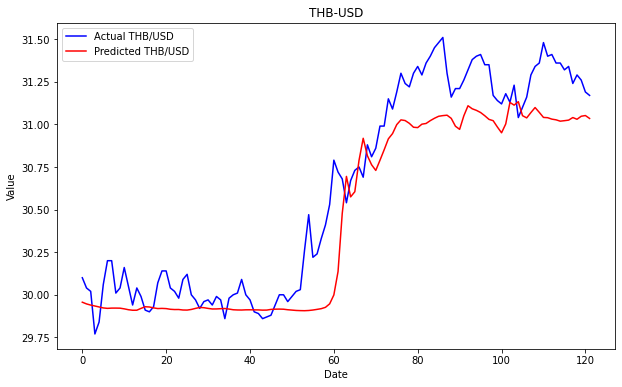

In [ ]:
test_dataset = numpy.loadtxt("thb_test.csv", delimiter=",")
test_dataset_scaled = sc.fit_transform(test_dataset.reshape(-1,1))

X_test = []
Y_test = []

for i in range(10, len(test_dataset_scaled)):
    X_test.append(test_dataset_scaled[i-10:i])
    Y_test.append(test_dataset[i])
X_test = numpy.array(X_test)
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)

plt.figure(figsize=(10,6))
plt.plot(Y_test, color="blue", label="Actual THB/USD")
plt.plot(predictions, color="red", label="Predicted THB/USD")
plt.title("THB-USD")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
